# LDA topic modeling with sklearn

**Latent Dirichlet Allocation (LDA)** is some other extensively used subject matter modelling technique that takes a probabilistic method to discovering the hidden thematic shape of a textual content corpus. Unlike LSA, which makes use of a linear algebraic method, LDA is a generative probabilistic version that assumes each report is a combination of a small number of subjects, and that every word's creation is as a result of one of the record's subjects.

The LDA algorithm works by means of assuming that each file in the corpus is composed of a combination of subjects, and that each topic is characterised by means of a distribution over the vocabulary. The version then iteratively updates the topic-phrase and report-subject matter distributions to maximise the probability of the found facts. The resulting topic representations can be used to understand the thematic shape of the textual content corpus and to carry out tasks which include file type, advice, and exploratory analysis.

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use("fivethirtyeight")
sns.set(style = "whitegrid", color_codes = True )

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# stop-words
stop_words = set(nltk.corpus.stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Loading the Dataset

In [3]:
df = pd.read_csv("/content/abcnews-date-text.csv")
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


Drop "publish_date" column

In [4]:
df.drop(["publish_date"], axis=1, inplace=True)

In [5]:
df.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


Data Cleaning and Pre-Processing

In [7]:
def clean_text(headline):
  le = WordNetLemmatizer()
  word_tokens = word_tokenize(headline)
  tokens = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w) > 3]
  cleaned_text = " ".join(tokens)
  return cleaned_text
  #  the stop words have been used along with the words wit lenght shorter than 3 characters to reduce some stray words.

In [10]:
# time taking
import nltk
nltk.download("wordnet")
df["headline_cleaned_text"] = df["headline_text"].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
df.head()

,headline_text,headline_cleaned_text
0,aba decides against community broadcasting lic...,decides community broadcasting licence
1,act fire witnesses must be aware of defamation,fire witness must aware defamation
2,a g calls for infrastructure protection summit,call infrastructure protection summit
3,air nz staff in aust strike for pay rise,staff aust strike rise
4,air nz strike to affect australian travellers,strike affect australian traveller


Drop unprocessed column

In [12]:
df.drop(["headline_text"], axis = 1, inplace=True)

In [13]:
df.head()

,headline_cleaned_text
0,decides community broadcasting licence
1,fire witness must aware defamation
2,call infrastructure protection summit
3,staff aust strike rise
4,strike affect australian traveller


Extracting the Features and Creating the Document-Term-Matrix

In [15]:
vect = TfidfVectorizer(stop_words = stop_words, max_features = 1000)

In [18]:
vect = TfidfVectorizer(stop_words=list(stop_words)) # convert stopwords from set to list

vect_text=vect.fit_transform(df['headline_cleaned_text'])

We can now see the most frequent and rare words in the news headlines based on idf score. The lesser the value; more common is the word in the news headlines.

In [19]:
print(vect_text.shape)
print(vect_text)

(468991, 42863)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2186512 stored elements and shape (468991, 42863)>
  Coords	Values
  (0, 10605)	0.5530616267626154
  (0, 8755)	0.349202135944892
  (0, 6099)	0.6181791937672435
  (0, 22375)	0.43593025777926414
  (1, 14624)	0.29585045071614285
  (1, 42065)	0.41907936544998275
  (1, 25817)	0.4186542427102765
  (1, 3514)	0.5394911516731359
  (1, 10705)	0.5201181775252366
  (2, 6798)	0.3590158510003461
  (2, 19472)	0.549187568328443
  (2, 30136)	0.5299077856177346
  (2, 37034)	0.5373065905660362
  (3, 36165)	0.5498942504171755
  (3, 3372)	0.47858062704460824
  (3, 36722)	0.500547748449682
  (3, 32471)	0.46693559330776657
  (4, 36722)	0.4210179882224437
  (4, 1733)	0.5284991319878656
  (4, 3400)	0.40421955804005355
  (4, 38991)	0.6164730894200514
  (5, 2303)	0.5088531686590078
  (5, 27172)	0.5970430677931863
  (5, 41914)	0.2878204646464607
  (5, 39141)	0.4012818288290736
  :	:
  (468984, 37584)	0.487243779504219
  (468984, 23352)	

In [21]:
idf = vect.idf_

In [24]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['police'])
print(dd['forecast'])  # police is most common and forecast is least common among the news headlines.

police zylvester
4.242865314500723
8.030062469482939


TOPIC MODELLING


Latent Dirichlet Allocation (LDA)

In [26]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 10, learning_method = "online", random_state =42, max_iter = 1)
# n_components is the number of topics

In [27]:
lda_top = lda_model.fit_transform(vect_text)

In [28]:
print(lda_top.shape)
print(lda_top)

(468991, 10)
[[0.03382523 0.03382523 0.03382523 ... 0.03382523 0.03382523 0.03382523]
 [0.03131725 0.03131661 0.03131661 ... 0.03131661 0.03131661 0.71814937]
 [0.03360873 0.03360873 0.03360873 ... 0.03360873 0.03360873 0.03360952]
 ...
 [0.0335053  0.0335053  0.0335053  ... 0.2303695  0.17201317 0.36308022]
 [0.03140104 0.03140371 0.03140446 ... 0.03140273 0.03140104 0.26840264]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]]


In [29]:
sum = 0
for i in lda_top[0]:
  sum = sum + 1
print(sum)

10


In [31]:
# Composition of doc 0 for eg
print("Document 0: ")
for i, topic in enumerate(lda_top[0]):
  print("Topic ", i, ": ", topic*100, "%")

Document 0: 
Topic  0 :  3.382522868900348 %
Topic  1 :  3.38252286895457 %
Topic  2 :  3.3825228689690805 %
Topic  3 :  69.55729417975539 %
Topic  4 :  3.382522869034877 %
Topic  5 :  3.382522868746326 %
Topic  6 :  3.382522868836314 %
Topic  7 :  3.38252286902651 %
Topic  8 :  3.38252286897312 %
Topic  9 :  3.3825228688034605 %


In [32]:
print(lda_model.components_)
print(lda_model.components_.shape)

[[ 0.10000008  0.10000001  0.10021834 ...  0.1000005  18.16524342
   0.10352054]
 [ 0.10100282  0.10000001  0.10022068 ...  0.10807331  0.10000571
   0.10277392]
 [ 0.10000007  0.10000001  0.10022601 ...  0.10000049  0.10003349
   0.10000024]
 ...
 [ 0.10137228  0.10000001  0.10023095 ...  0.1000045   0.10002563
   0.10000025]
 [ 0.10000008  0.10000001  0.10022698 ...  0.10218938  0.1000265
   0.10000026]
 [ 0.10000007  0.10000001  1.64722686 ...  0.10000046  0.10000139
   0.10000023]]
(10, 42863)


In [36]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key = lambda x:x[1], reverse = True)[:10]

  print("Topic "+str(i)+": ")
  for t in sorted_words:
    print(t[0], end = " ")
  print("\n")

Topic 0: 
charged accused aussie australian blaze deal scheme sydney told former 

Topic 1: 
crash killed police probe push fatal fall win stimulus final 

Topic 2: 
hospital child north group local welcome hope test union protest 

Topic 3: 
rudd swine australia urged bushfire victim opposition mine make community 

Topic 4: 
say talk change call china centre funding indigenous price first 

Topic 5: 
face court death report take missing case road assault teen 

Topic 6: 
plan school budget market job dead boost election urge health 

Topic 7: 
attack woman coast back obama minister business house gold injured 

Topic 8: 
interview year service found dy open jailed cut time fear 

Topic 9: 
police home drug fire green driver worker rate melbourne resident 



To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [37]:
from wordcloud import WordCloud

# Generate a wordcloud image for given topic
def draw_word_cloud(index):
  imp_words_topic = ""
  comp = lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key = lambda x:x[1], reverse = True)[:50]
  for word in sorted_words:
    imp_words_topic = imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width = 600, height = 400).generate(imp_words_topic)
  plt.figure(figsize = (5, 5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

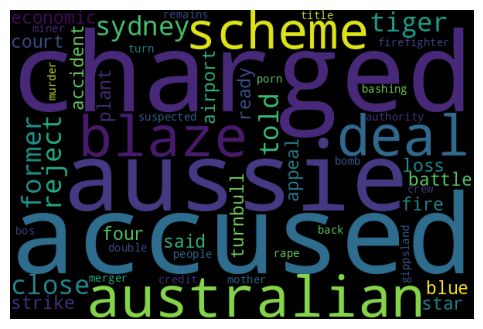

In [38]:
# Topic 0
draw_word_cloud(0)

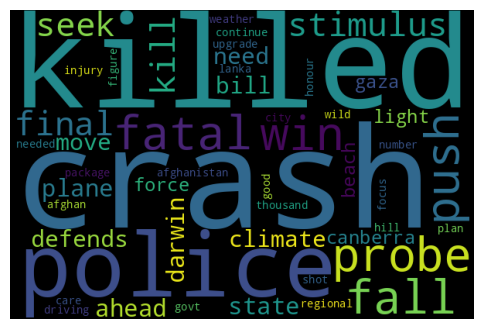

In [39]:
# Topic 1
draw_word_cloud(1)

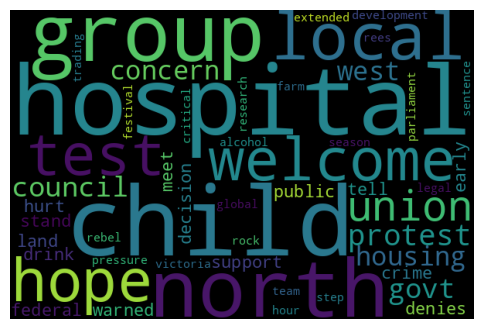

In [40]:
# Topic 2
draw_word_cloud(2)